### import required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv'

### load  **Candy Power Ranking** dataset

In [3]:
df=pd.read_csv(url)
df.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


### inspect the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


**The Candy Power Ranking** dataset contains 9 categorical variables **(chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus)**, 3 continuous variables **(sugarpercent, pricepercent, winpercent)**, and 1 nominal variable **competitorname**.

+ The dataset contains the following fields:

   + **chocolate**	Does it contain chocolate?
   + **fruity**	Is it fruit flavored?
   + **caramel**	Is there caramel in the candy?
   + **peanutalmondy**	Does it contain peanuts, peanut butter or almonds?
   + **nougat**	Does it contain nougat?
   + **crispedricewafer**	Does it contain crisped rice, wafers, or a cookie component?
   + **hard**	Is it a hard candy?
   + **bar**	Is it a candy bar?
   + **pluribus**	Is it one of many candies in a bag or box?
   + **sugarpercent**	The percentile of sugar it falls under within the data set.
   + **pricepercent**	The unit price percentile compared to the rest of the set.
   + **winpercent**	The overall win percentage 

For categorical variables, **0** signifies **does not contain that property**,' while **1** indicates **contains that property**

# Exploratory Data Analysis (EDA)

### check dimension of the dataset

In [5]:
df.shape

(85, 13)

dataset contains 85 rows and 13 columns

### check for missing or null values

In [6]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

there is no **missing** or **null** value :)

### check for duplicate values

In [7]:
df.duplicated().sum()

0

the dataset is seemed to be already cleaned. so we do not need to clean the dataset.:)

### descriptive statistics on continuous variables

In [8]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800
pricepercent,85.0,0.468882,0.285740,0.011000,0.255000,0.465000,0.651000,0.97600
winpercent,85.0,50.316764,14.714357,22.445341,39.141056,47.829754,59.863998,84.18029


An intriguing observation is that both 'sugarpercent' and 'pricepercent' exhibit remarkably similar statistical characteristics, showcasing nearly identical values for mean, standard deviation, minimum, and maximum:

### descriptive statistics on categorical variables

In [9]:
cols=df.columns.tolist() ## cols stores all the column names.

In [10]:
df[[col for col in cols if col not in ['sugarpercent','pricepercent','winpercent',
                                       'competitorname']]].astype('object').describe().T 
## converting int->object in order to perform describe method on categorical variables

,count,unique,top,freq
chocolate,85,2,0,48
fruity,85,2,0,47
caramel,85,2,0,71
peanutyalmondy,85,2,0,71
nougat,85,2,0,78
crispedricewafer,85,2,0,78
hard,85,2,0,70
bar,85,2,0,64
pluribus,85,2,1,44


Most of the candies do not have the given properties except for **pluribus**.

### checking for **outlier** in **sugarpercent** and **pricepercent**

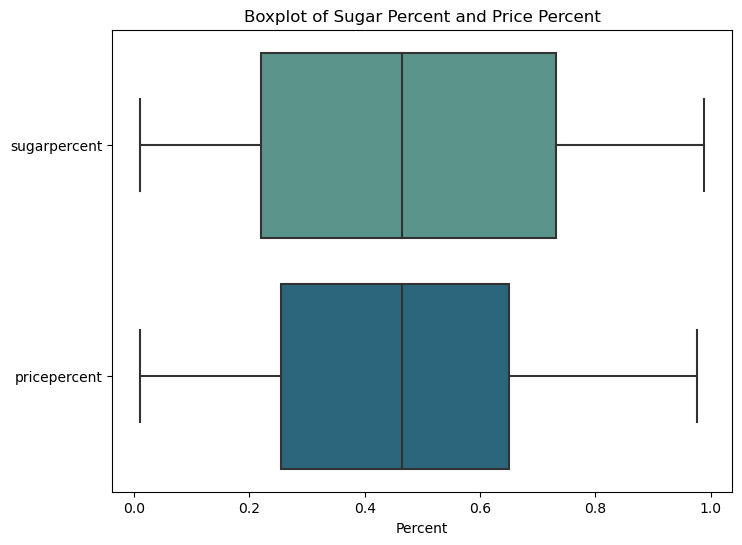

In [11]:
data = {
    'sugarpercent': df['sugarpercent'],
    'pricepercent': df['pricepercent']
}
df_box = pd.DataFrame(data)
# Creating a horizontal boxplot for both variables
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_box, orient='h',palette='crest')
plt.title('Boxplot of Sugar Percent and Price Percent')
plt.xlabel('Percent')
plt.show()

there is no **outlier**

### Let's examine the seven most popular and seven least popular candies.

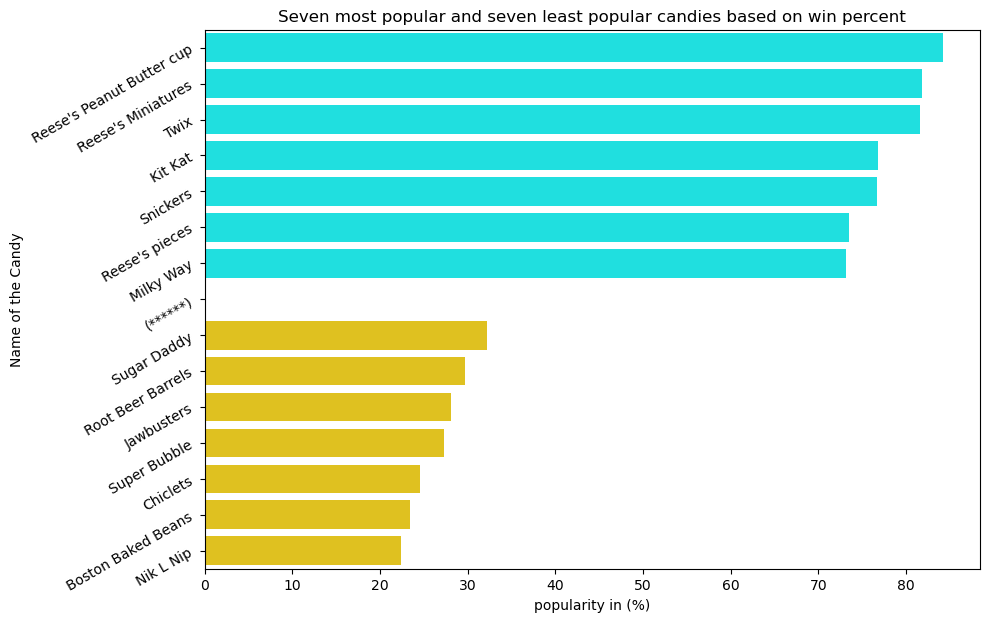

In [12]:
plt.figure(figsize=(10, 7))
sorted_df=df.sort_values(by='winpercent',ascending=False)
sns.barplot(data=pd.concat([sorted_df.head(7),pd.DataFrame({'competitorname':['(******)'],'winpercent':[0]}),
     sorted_df.tail(7)]),x='winpercent',y='competitorname',palette=['#00FFFF']*7 +['white']+ ['#FFD700']*7)
plt.xlabel('popularity in (%)')
plt.ylabel('Name of the Candy')
plt.yticks(rotation=30)
plt.title("Seven most popular and seven least popular candies based on win percent")
plt.show()

+ **Reese's Peanut Butter cup** is the most popular Candy with the winpercent of more than $80\%$.
+ **Nik L Nip** is the least popular Candy with the winpercent of almost $20\%$.

In [13]:
df[df['chocolate']==1]['winpercent'].mean(),df[df['chocolate']==0]['winpercent'].mean()

(60.9215294054054, 42.142257)

In [14]:
df[df['caramel']==1]['winpercent'].mean(),df[df['caramel']==0]['winpercent'].mean()

(57.34690771428571, 48.930538253521135)

In [15]:
df[df['peanutyalmondy']==1]['winpercent'].mean(),df[df['peanutyalmondy']==0]['winpercent'].mean()

(63.69713678571429, 47.6783804084507)

In [16]:
df[df['fruity']==1]['winpercent'].mean(),df[df['fruity']==0]['winpercent'].mean()

(44.11974142105264, 55.32712234042552)

In [17]:
df[df['hard']==1]['winpercent'].mean(),df[df['hard']==0]['winpercent'].mean()

(40.5089818, 52.418431385714285)

In [18]:
df[(df['nougat']==1) & (df['chocolate']==1) & (df['peanutyalmondy']==1) & (df['caramel']==1) ]['winpercent'].mean()

66.7941645

In [19]:
df[df['pluribus']==1]['winpercent'].mean(),df[df['pluribus']==0]['winpercent'].mean()

(46.822780818181826, 54.06640409756098)

## Let's create visualizations highlighting the distinguishing characteristics that contribute to a candy's popularity, whether it ranks among the most favored or least favored.

In [20]:
cat_vars=["chocolate","fruity","caramel","peanutyalmondy","nougat","crispedricewafer","hard","bar","pluribus"]
cont_vars=['sugarpercent','pricepercent','winpercent']

In [21]:
# function to visualize the properties of  most and least 15 popular Candies.
def visualize_most_least_popular_candies(df_l,type):
    fig, ax = plt.subplots(4, 3, figsize=(13, 13))
    axes = ax.flatten()
    idx = 0
    for i in range(3):
        for j in range(3):  
            if idx < len(cat_vars):
                sns.countplot(x=cat_vars[idx], data=df_l, ax=ax[i, j], palette='crest')
                axes[idx].set_title(f'Is {cat_vars[idx]} ?')
                axes[idx].set_ylabel('Count')
                counts = df_l[cat_vars[idx]].value_counts(normalize=True) * 100
                no_percent = counts[0] if 0 in counts.index else 0
                yes_percent = counts[1] if 1 in counts.index else 0
                axes[idx].set_xticks([0, 1])
                axes[idx].set_xticklabels([f"No ({no_percent:.2f}%)", f"Yes ({yes_percent:.2f}%)"], rotation=45)
            else:
                # Hide the empty subplot
                ax[i, j].axis('off')
            idx += 1
    # Plot histograms for continuous variables
    sns.histplot(df_l['sugarpercent'], ax=ax[3, 0], kde=True, palette='crest')
    ax[3, 0].set_title('Sugar Percent Distribution')
    ax[3, 0].set_xlabel('Sugar Percent')

    sns.histplot(df_l['pricepercent'], ax=ax[3, 1], kde=True, palette='crest')
    ax[3, 1].set_title('Price Percent Distribution')
    ax[3, 1].set_xlabel('Price Percent')

    # Hide the empty subplot
    ax[3, 2].axis('off')

    plt.suptitle(f'Properties of {type} popular 15 Candies.')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

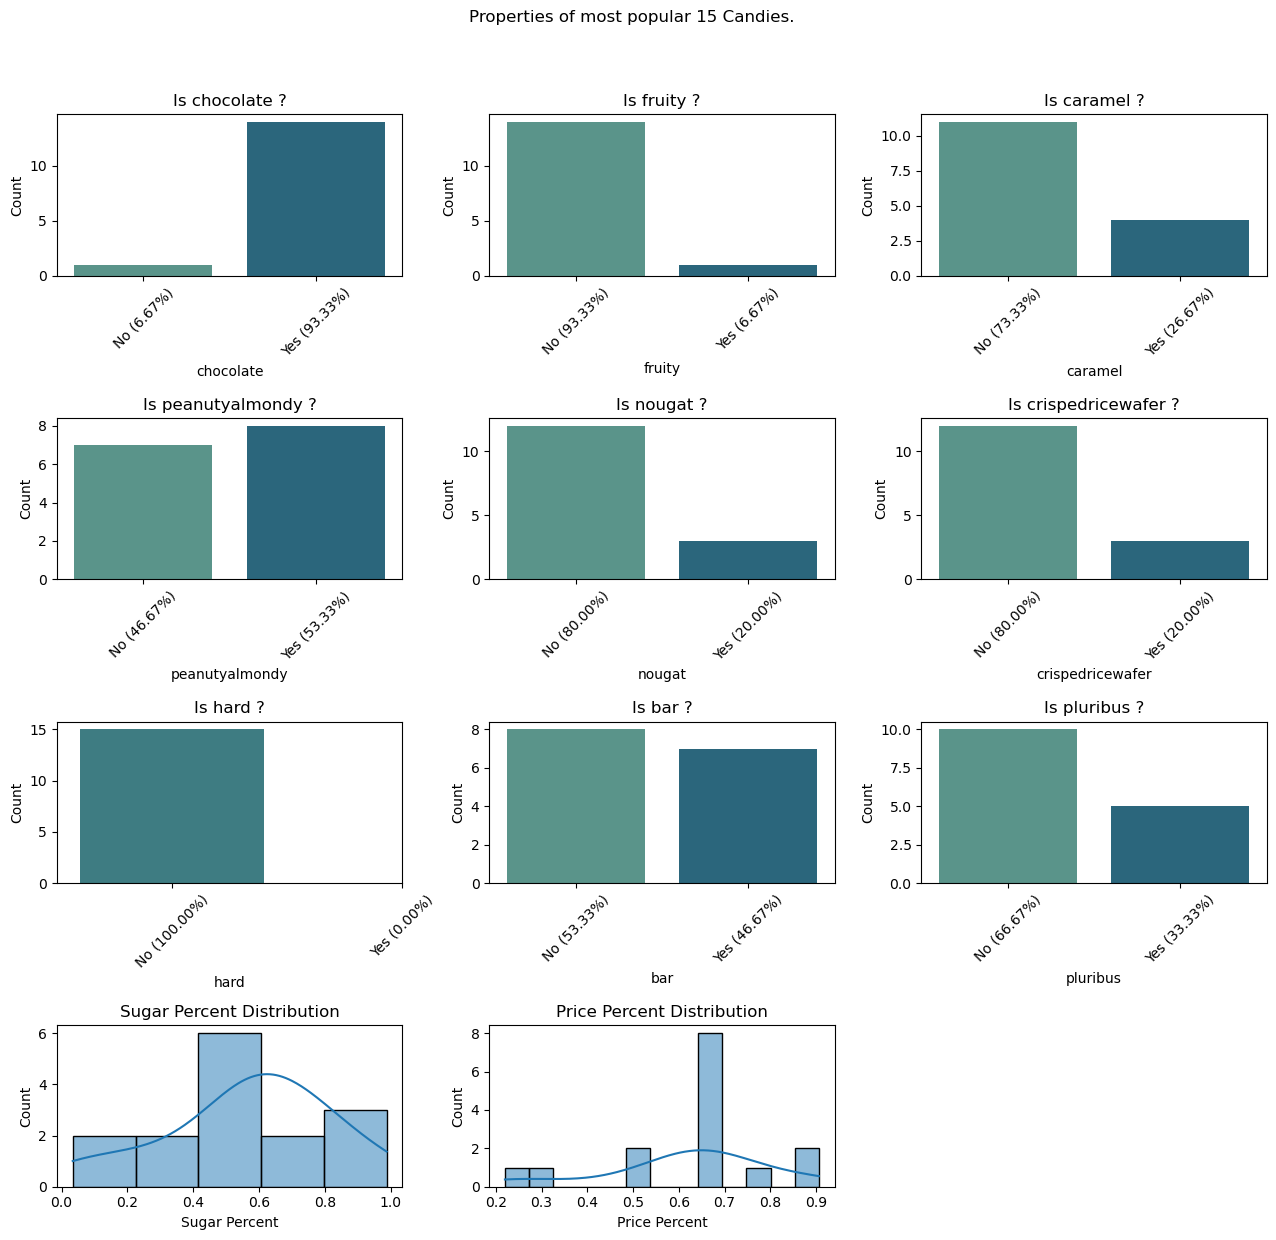

In [22]:
visualize_most_least_popular_candies(df.sort_values(by="winpercent",ascending=False).iloc[:15,:],"most")

### Analysis of Top 15 Candies:
   + The majority $(93.3\%)$ of the most popular candies feature **chocolate**, while only a small proportion $(6.6\%)$ include **fruity** flavors.
   + None of these top-ranked candies belong to the category of **hard** candies.
   + Approximately half $(53.33\%)$ of them are not Candy **bars**.
   + Almost $(53.33\%)$ of the most popular candies contains **peanutyalmondy**.
   + Between $15\%$ to $30\%$ of these candies contain **pluribus**, **nougat**, **caramel** and **crispedricewafer**, showing a relatively limited presence of these particular ingredients among the selection.
   + Additionally, these popular candies exhibit characteristics of high **sugar conten**t and a tendency towards      **higher pricing**.

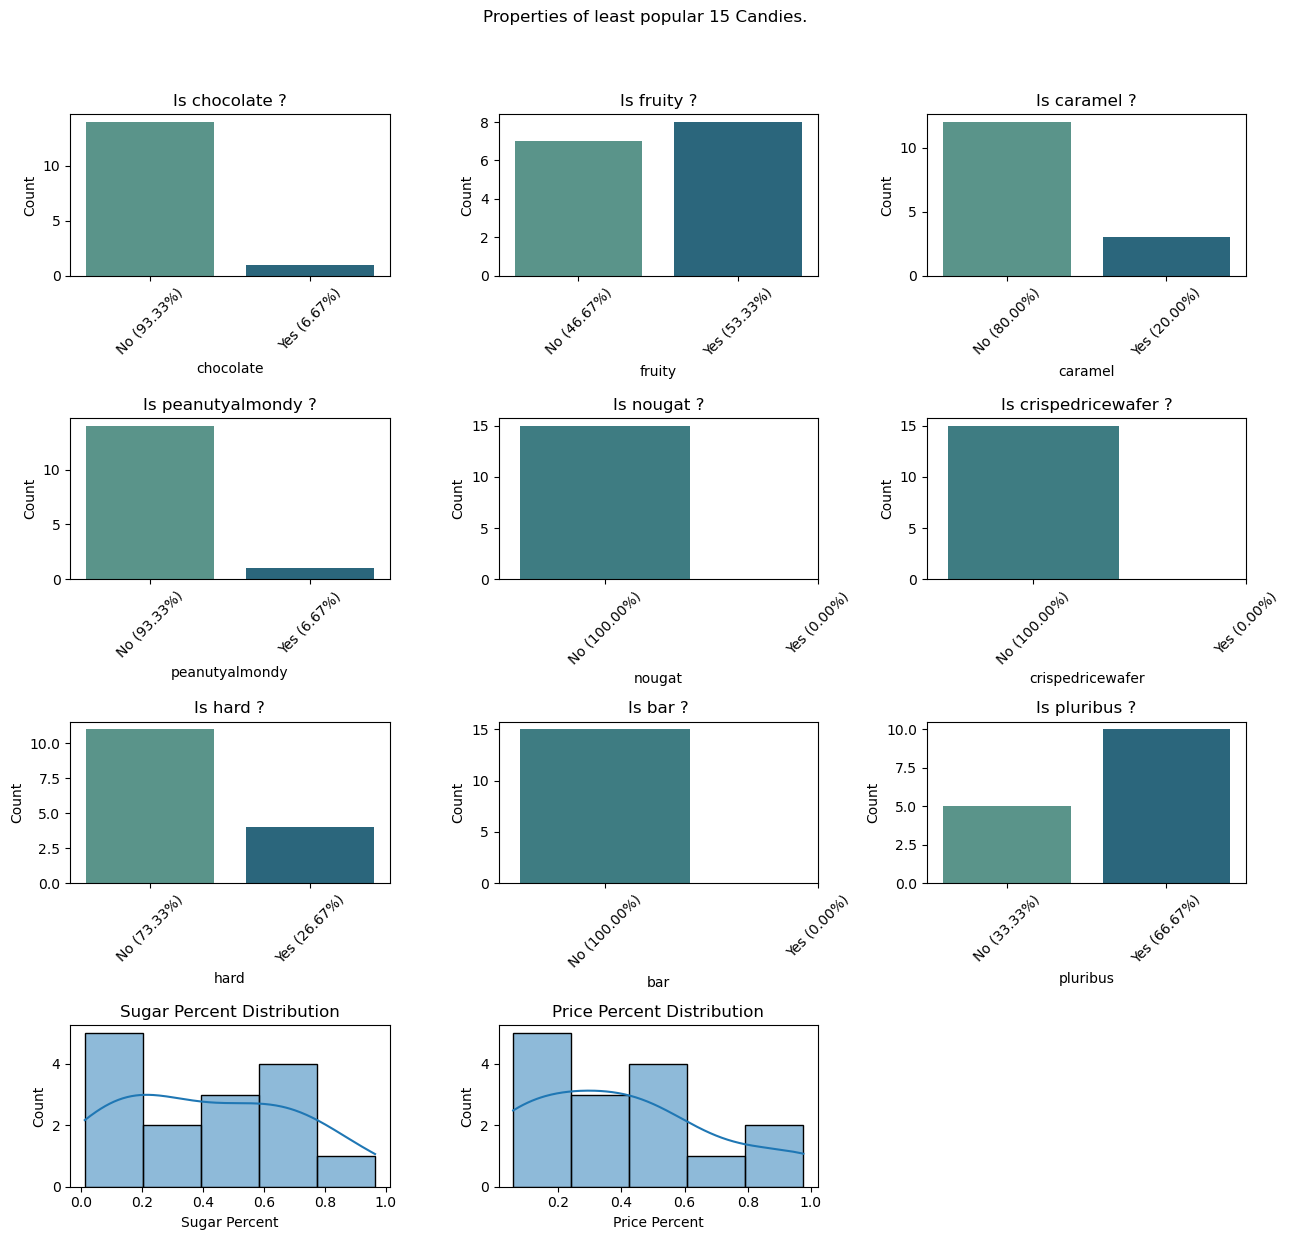

In [23]:
visualize_most_least_popular_candies(df.sort_values(by="winpercent",ascending=True).iloc[:15,:],"least")

### Analysis of Bottom 15 Candies:
 + Examining the least popular 15 candies reveals stark differences compared to the top 15 candies.

 + Only a small percentage (6.6%) of the least popular candies feature chocolate, while a majority (53%) incorporate fruity flavors.

 + The majority of these less favored candies do not fall under the category of hard candies. None of them are Candy bars.

+ Moreover, these less popular candies also display a limited presence of ingredients such as **pluribus**, **nougat**, **caramel**, **peanutyalmondy**, and **crispedricewafer**.

+ Interestingly, these less popular candies tend to have lower sugar content and are priced relatively lower.

**In summary**, popular candies often feature **chocolate**, **peanutyalmondy** exclude **hard** candies, and lean towards Candy **bars**. They may include certain ingredients but tend to have higher sugar content and pricing. On the other hand, less popular candies commonly incorporate fruity flavors, fewer Candy bar variations, and generally have lower sugar content and pricing.

#### To facilitate broader analysis, let's transform the continuous variable 'winpercent' into a categorical variable with three classes: 'low winpercent,' 'medium winpercent,' and 'high winpercent.' This categorization will allow for a more generalized evaluation of the data.

In [24]:
df['winpercent'].describe()

count    85.000000
mean     50.316764
std      14.714357
min      22.445341
25%      39.141056
50%      47.829754
75%      59.863998
max      84.180290
Name: winpercent, dtype: float64

In [25]:
# convert winpercent from continous->categorical variable
def convert_winpercent_to_cat(x):
    if x>=22.44 and x<43:
        return 'low'
    elif x>=43 and x<66:
        return 'medium'
    return 'high'

In [26]:
df['winpercent_class']=df['winpercent'].apply(convert_winpercent_to_cat)

###  distribution of winpercent in three categories

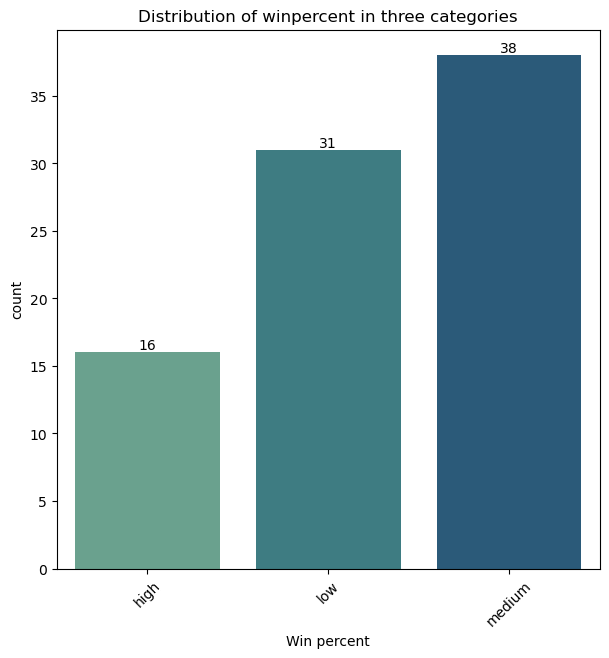

In [27]:
plt.figure(figsize=(7, 7))
ax=sns.countplot(x='winpercent_class', data=df, palette='crest')
plt.xticks(rotation=45)
plt.title("Distribution of winpercent in three categories")
plt.xlabel("Win percent")
ax.bar_label(ax.containers[0])
plt.show()

+ We notice that $44.7\%$ of the candies fall within the medium winpercent category, while $18.82\%$ belong to the high winpercent category.

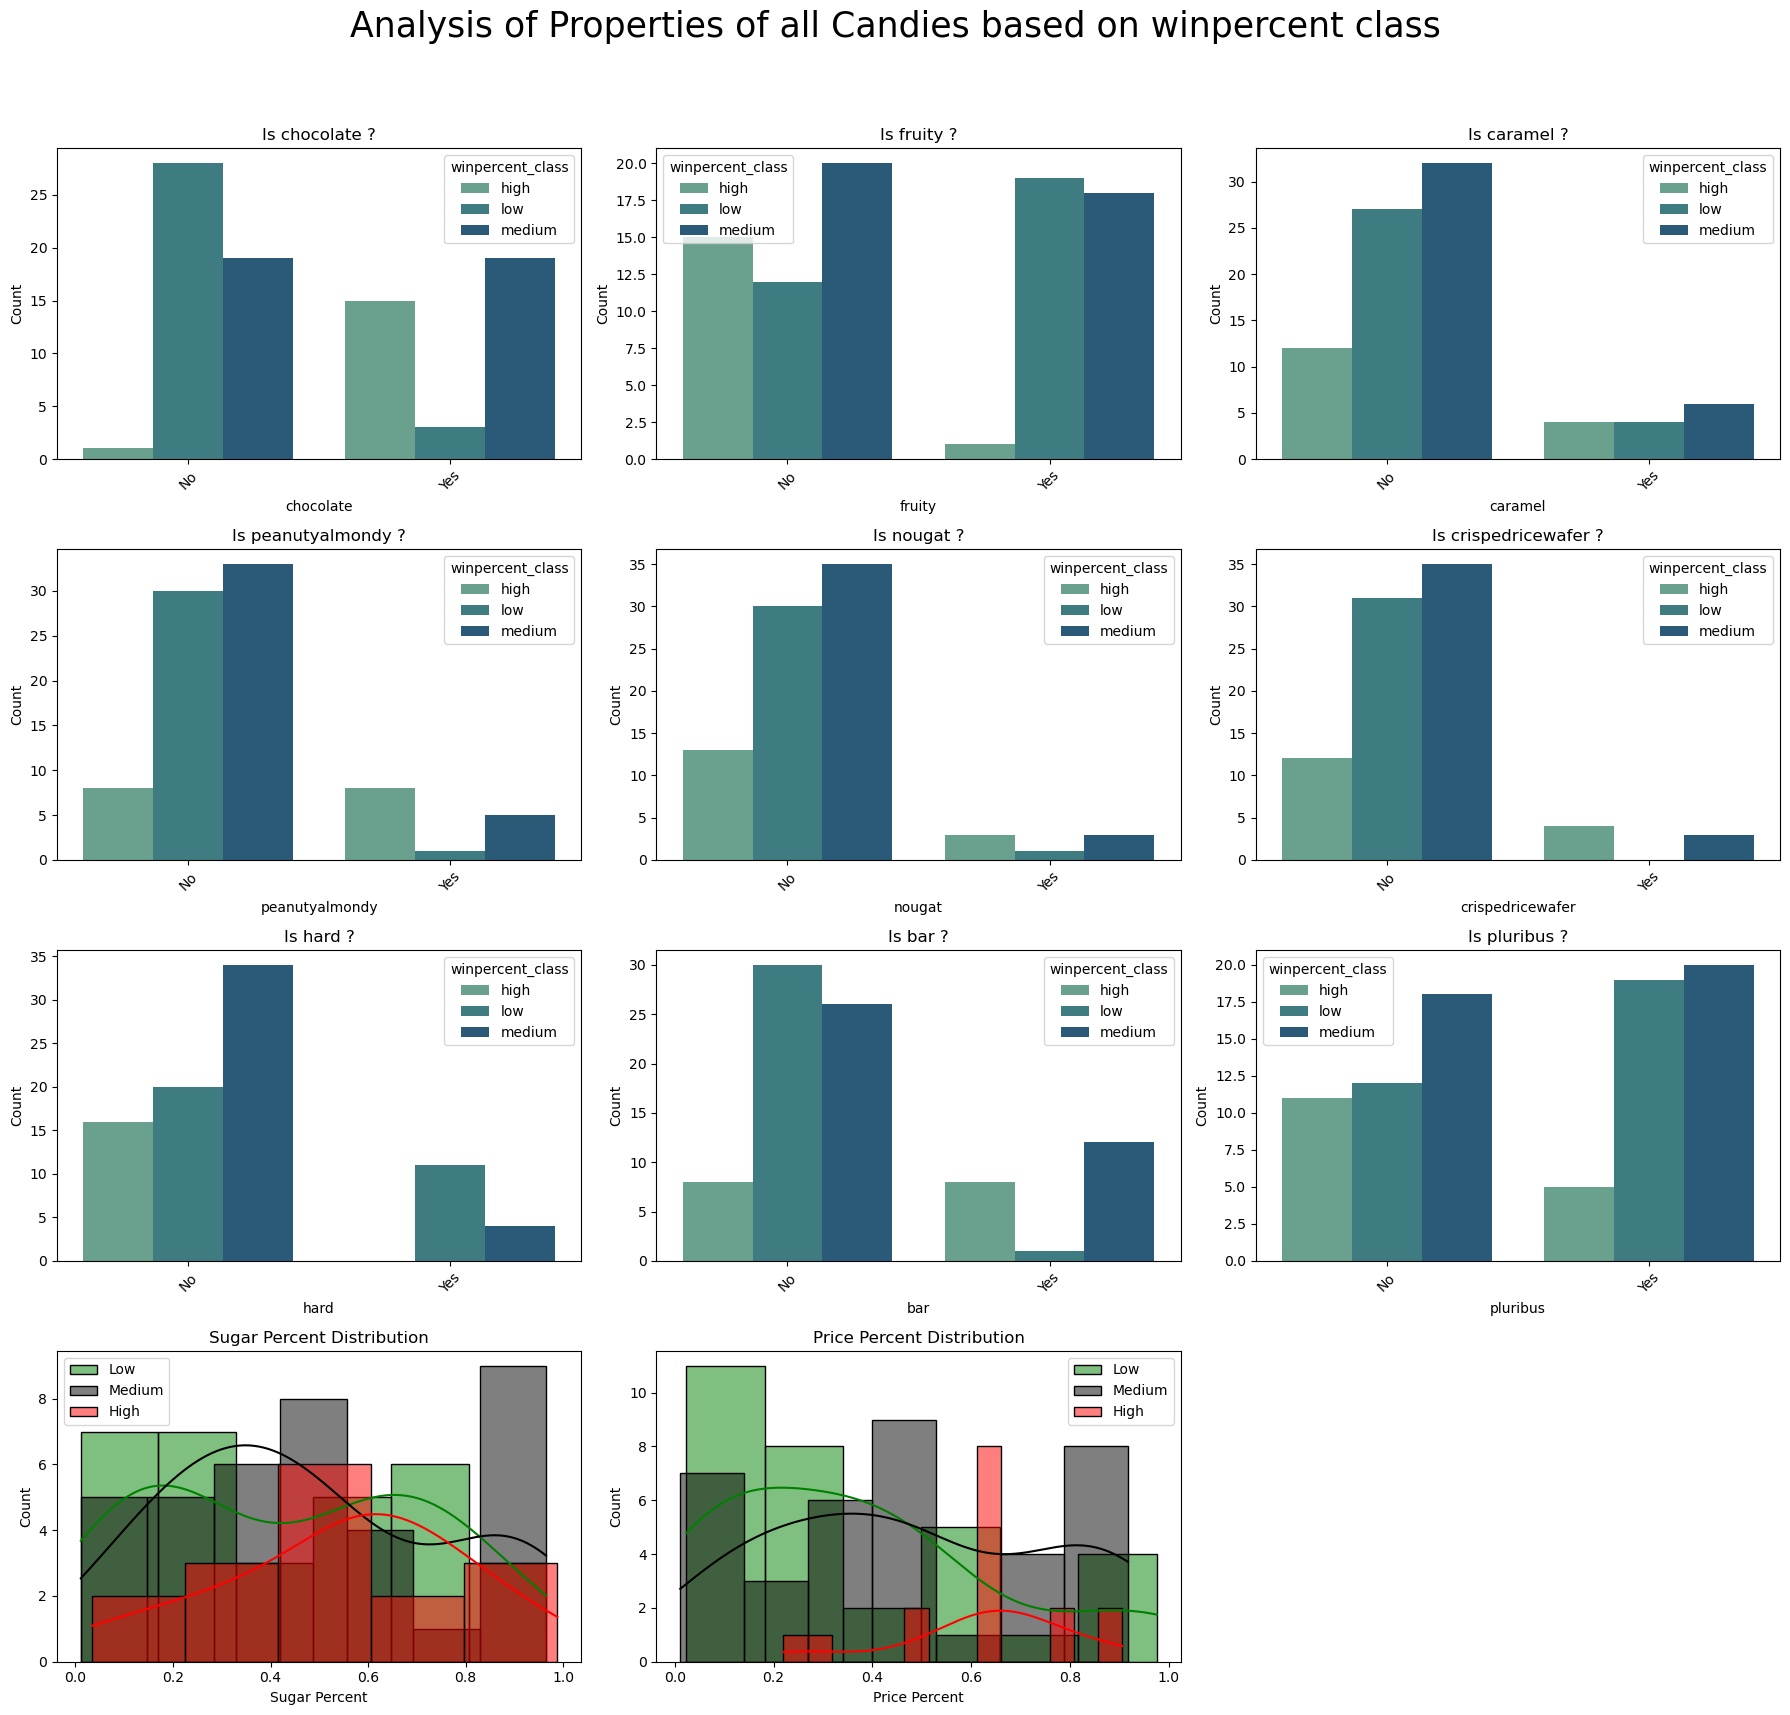

In [28]:

fig, ax = plt.subplots(4, 3, figsize=(18, 18))
axes = ax.flatten()
idx = 0

for i in range(3):
    for j in range(3):  
        if idx < len(cat_vars):
            sns.countplot(x=cat_vars[idx], data=df, ax=ax[i, j], palette='crest', hue='winpercent_class')
            axes[idx].set_title(f'Is {cat_vars[idx]} ?')
            axes[idx].set_ylabel('Count')
            axes[idx].set_xticks([0, 1])
            axes[idx].set_xticklabels(['No','Yes'], rotation=45)
        else:
            # Hide the empty subplot
            ax[i, j].axis('off')
        idx += 1

# Plot separate histograms for continuous variables based on 'winpercent_class'
for cls, color in zip(['low', 'medium', 'high'], ['green', 'black', 'red']):
    sns.histplot(df[df['winpercent_class'] == cls]['sugarpercent'], ax=ax[3, 0], kde=True, color=color, label=cls.capitalize())
    sns.histplot(df[df['winpercent_class'] == cls]['pricepercent'], ax=ax[3, 1], kde=True, color=color, label=cls.capitalize())

ax[3, 0].set_title('Sugar Percent Distribution')
ax[3, 0].set_xlabel('Sugar Percent')
ax[3, 1].set_title('Price Percent Distribution')
ax[3, 1].set_xlabel('Price Percent')
ax[3, 0].legend()
ax[3, 1].legend()

# Hide the empty subplot
ax[3, 2].axis('off')

plt.suptitle('Analysis of Properties of all Candies based on winpercent class',fontsize=25,color='black')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Exploration of Candy Properties Across Three Categories:


 + Candies exhibiting medium to high 'winpercent' values predominantly feature chocolate.

 + Candies with medium to low 'winpercent' commonly possess fruity characteristics.

 + Candies showing medium to high 'winpercent' tend to have the characteristic of being in a bar form.

 + Candies with high 'winpercent' often contain the 'peanutyalmondy' attribute.

 + Candies with lower 'winpercent' demonstrate lower sugar content and lower pricing. Conversely, candies with         medium to high 'winpercent' typically feature relatively higher sugar content and are priced higher.

 

### Observe correlation between each variable.

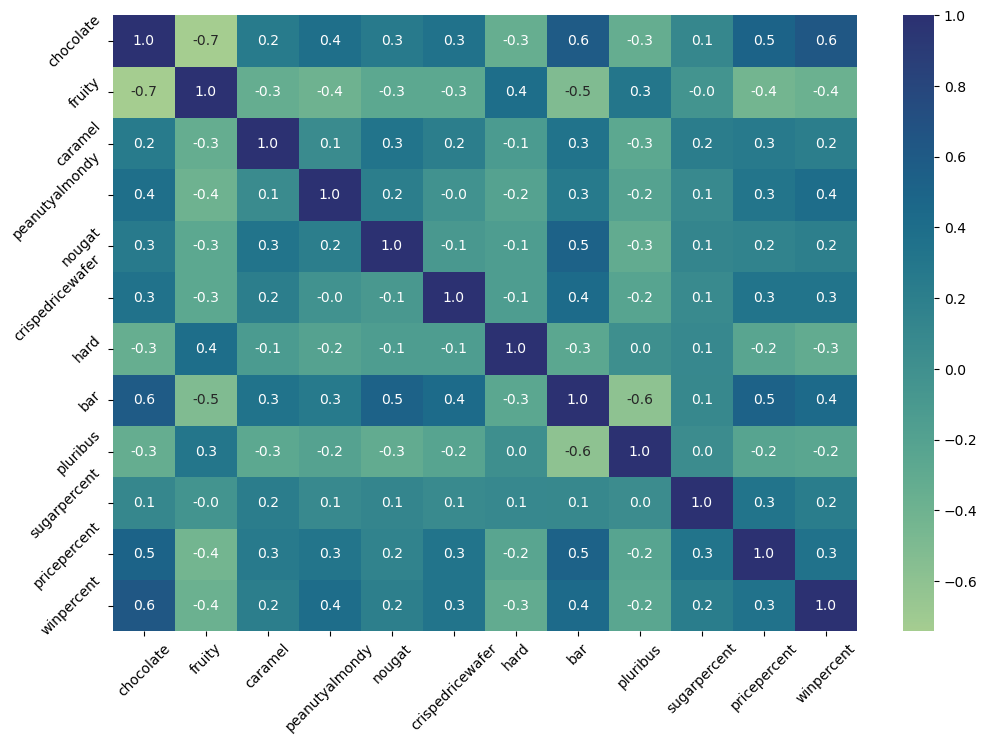

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='0.1f',cmap='crest')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

We see that **chocolate** and **winpercent** have the largest correlation. Also bar and winpercent just as peanutyalmondy and winpercent have noticeable correlations. But we have to be careful because also **chocolate** and **bar** have a large correlation.

## Analysis focusing on a single variable.

### chocolate

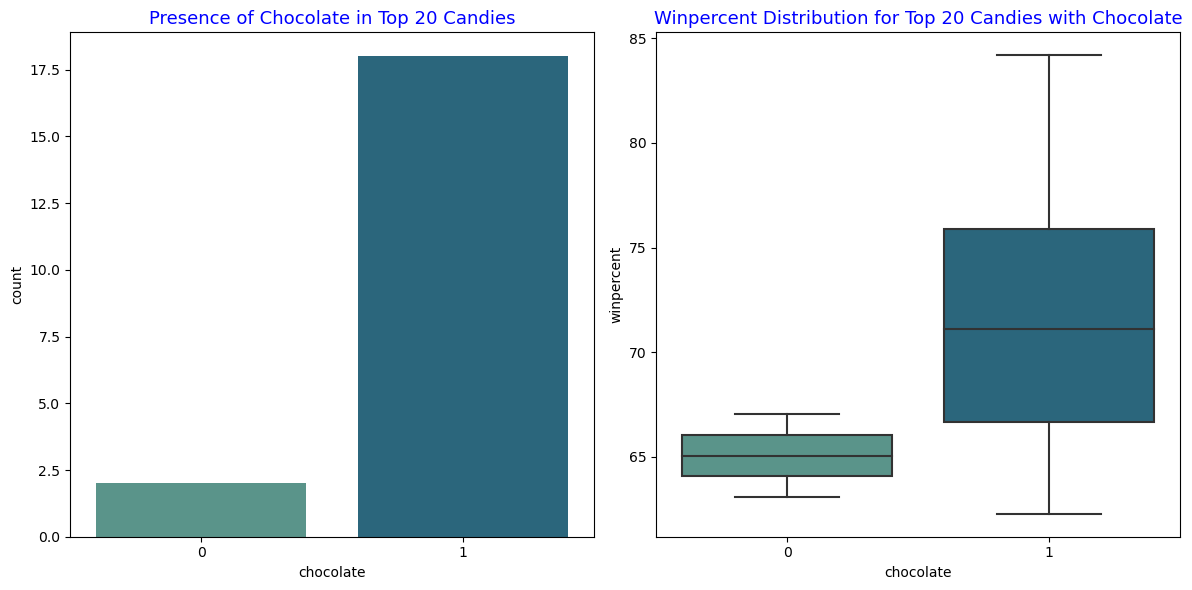

In [30]:
ig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Corrected figsize and subplot layout

data_top_20 = df[['chocolate', 'winpercent']].sort_values(by='winpercent', ascending=False).iloc[0:20,]

sns.countplot(x='chocolate', data=data_top_20, palette='crest', ax=ax[0])  # Plotting count plot
#sns.boxenplot(data=data_top_20,x='chocolate', y='winpercent', palette='crest', ax=ax[1])  # Plotting boxen plot
sns.boxplot(data=data_top_20,x='chocolate',y='winpercent',palette='crest',orient='v')
ax[0].set_title('Presence of Chocolate in Top 20 Candies',fontsize=13,color='blue')  # Adding title to count plot
ax[1].set_title('Winpercent Distribution for Top 20 Candies with Chocolate',fontsize=13,color='blue')  # Adding title to boxen plot

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()

From top 20 candies only 2 of them are non-chocolate candies. Boxplot shows the strong correlation of **chocolate** to **winpercent**

### bar

In [31]:
df[(df['bar']==1) & (df['chocolate']==0)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,winpercent_class
46,Payday,0,0,0,1,1,0,0,1,0,0.465,0.767,46.296597,medium


In [32]:
df[(df['bar']==1) & (df['chocolate']==1)].shape

(20, 14)

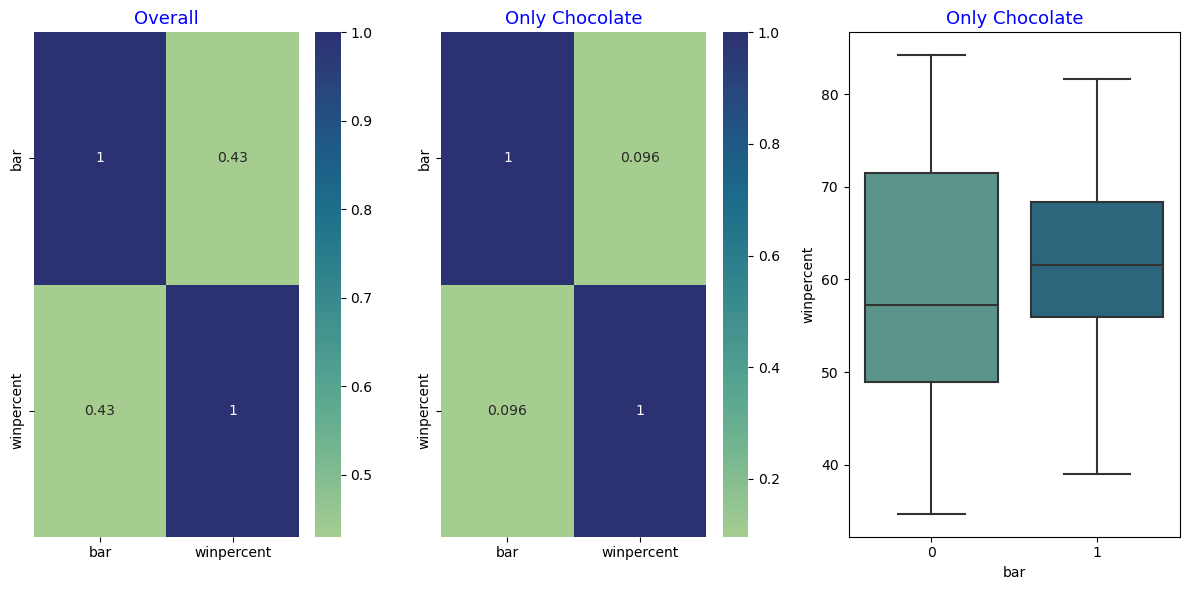

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))  # Corrected figsize and subplot layout
sns.heatmap(df[['bar','winpercent']].corr(), ax=ax[0],annot=True,cmap='crest')  # Plotting count plot
sns.heatmap(df[df.chocolate == 1][['bar', 'winpercent']].corr(),annot=True, ax=ax[1],cmap='crest')  # Plotting boxen plot
sns.boxplot(data=df[df['chocolate']==1],x='bar',y='winpercent',palette='crest',orient='v')
ax[0].set_title('Overall',fontsize=13,color='blue')  # Adding title to count plot
ax[1].set_title('Only Chocolate',fontsize=13,color='blue')  # Adding title to boxen plot
ax[2].set_title('Only Chocolate',fontsize=13,color='blue')  # Adding title to boxen plot
plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()

Initially, a strong correlation was found between **bar** and **winpercent**, but this association was primarily driven by the presence of chocolate. Considering only candies with **chocolate**, the correlation between **bar** and **winpercent** vanished. There is also a small difference in winpercent between **chocolate** with **bar** or without **bar**.

In [34]:
## function to show a combination of chocolate with other variable.
def chocolate_with_x(x):
   return df[['chocolate', x, 'competitorname'
   ]].groupby(['chocolate', x], as_index=False).count()

In [35]:
## function show winpercent of a feature overall and in combination with chocolate with the help of bar and boxplot
def bar_box_plot_showing_winpercent(x):
    # Calculate the average winpercent for candies grouped by a given variable
    avg_winpercent = df.groupby(x)['winpercent'].mean().reset_index()

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Corrected figsize and subplot layout

    sns.barplot(x=x,y='winpercent', data=avg_winpercent, palette='crest', ax=ax[0])  # Plotting count plot
    sns.boxplot(data=df[df['chocolate']==1], x=x, y="winpercent", palette="crest")

    ax[0].set_title('Overall',fontsize=13,color='blue')  # Adding title to count plot
    ax[1].set_title('Only Chocolate',fontsize=13,color='blue')  # Adding title to boxen plot
    ax[0].set_ylabel('Avg winpercent',fontsize=13)
    ax[1].set_ylabel('winpercent',fontsize=13)
    plt.tight_layout()  # Adjusts subplot parameters to give specified padding
    plt.show()
    plt.show()

In [36]:
def get_mean_winpercent_chocolate_with_x(x):
    return df[(df['chocolate']==1) & (df[x]==1)]['winpercent'].mean() 

In [37]:
def get_mean_winpercent_chocolate_without_x(x):
    return df[(df['chocolate']==1) & (df[x]==0)]['winpercent'].mean() 

### peanutyalmondy
As we saw there is a strong correlation between peanutyalmondy and chocolate let's have a close look on it.

In [38]:
## combination of chocolate with peanutyalmondy
chocolate_with_x('peanutyalmondy')

,chocolate,peanutyalmondy,competitorname
0,0,0,46
1,0,1,2
2,1,0,25
3,1,1,12


In [39]:
get_mean_winpercent_chocolate_with_x('peanutyalmondy')

68.50379116666666

In [40]:
get_mean_winpercent_chocolate_without_x('peanutyalmondy')

57.28204375999999

As candies that are **peanutyalmondy** nearly always contain **chocolate**, we narrow down our analysis to focus exclusively on candies that include **chocolate**.

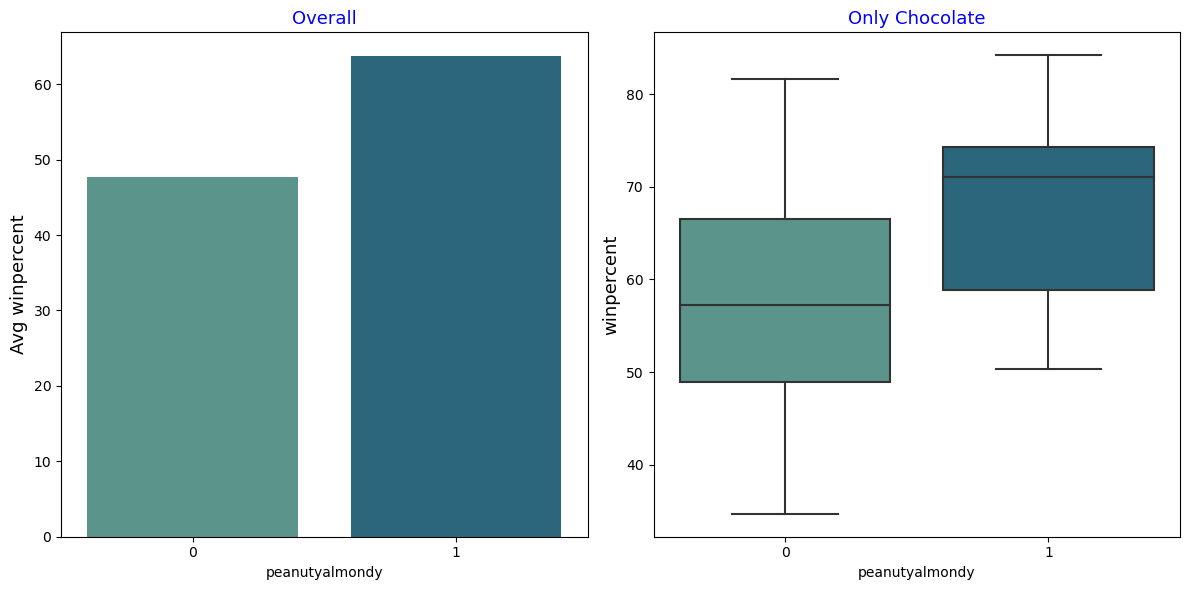

In [41]:
## winpercent of peanutyalmondy overall and also in combination with chocolate
bar_box_plot_showing_winpercent('peanutyalmondy')

The plot suggests that candies containing both **chocolate** and peanut/almond tend to outperform candies that have **chocolate** but lack peanut/almond.

### pluribus

In [42]:
## combination of chocolate with pluribus
chocolate_with_x('pluribus')

,chocolate,pluribus,competitorname
0,0,0,16
1,0,1,32
2,1,0,25
3,1,1,12


In [43]:
# avg winpercent by chocolate with pluribux
get_mean_winpercent_chocolate_with_x('pluribus')

56.850293666666666

In [44]:
# avg winpercent  by chocolate without pluribux
get_mean_winpercent_chocolate_without_x('pluribus')

62.87572256000001

Interestingly, despite the presence of **chocolate** in 12 different candies that also contain the **pluribus** feature, the inclusion of **pluribus** alongside **chocolate** appears to result in a decrease in the **winpercent** of these candies.

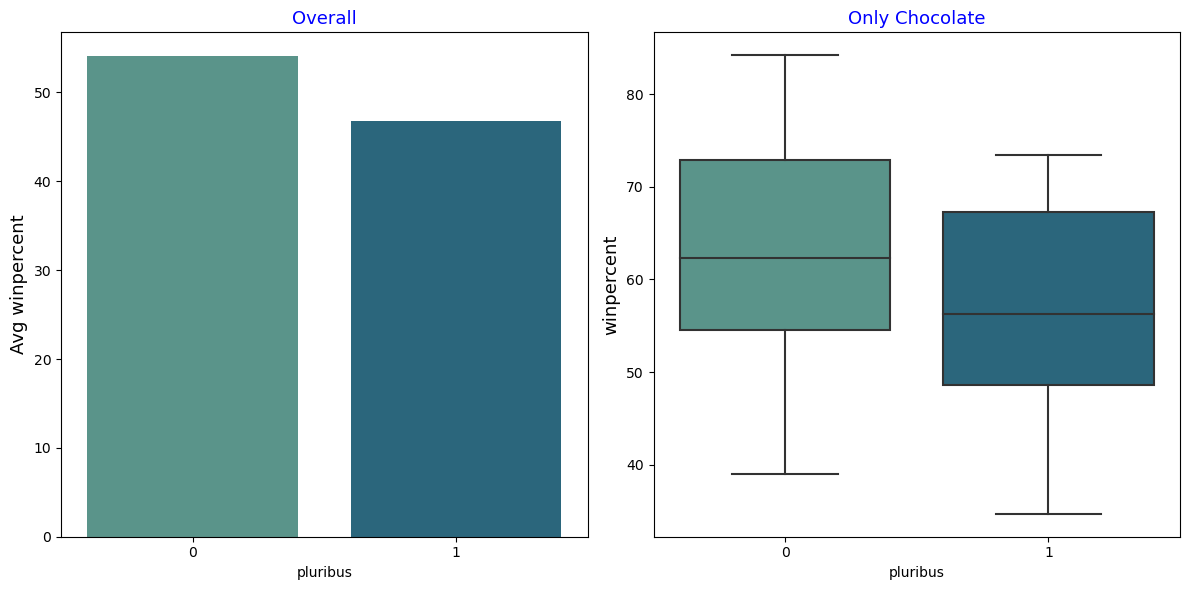

In [45]:
## winpercent of pluribus overall and also in combination with chocolate
bar_box_plot_showing_winpercent('pluribus')

candies with **pluribus** have in general low winpercent.

### nougat

In [46]:
## combination of chocolate with nougat
chocolate_with_x('nougat')

,chocolate,nougat,competitorname
0,0,0,47
1,0,1,1
2,1,0,31
3,1,1,6


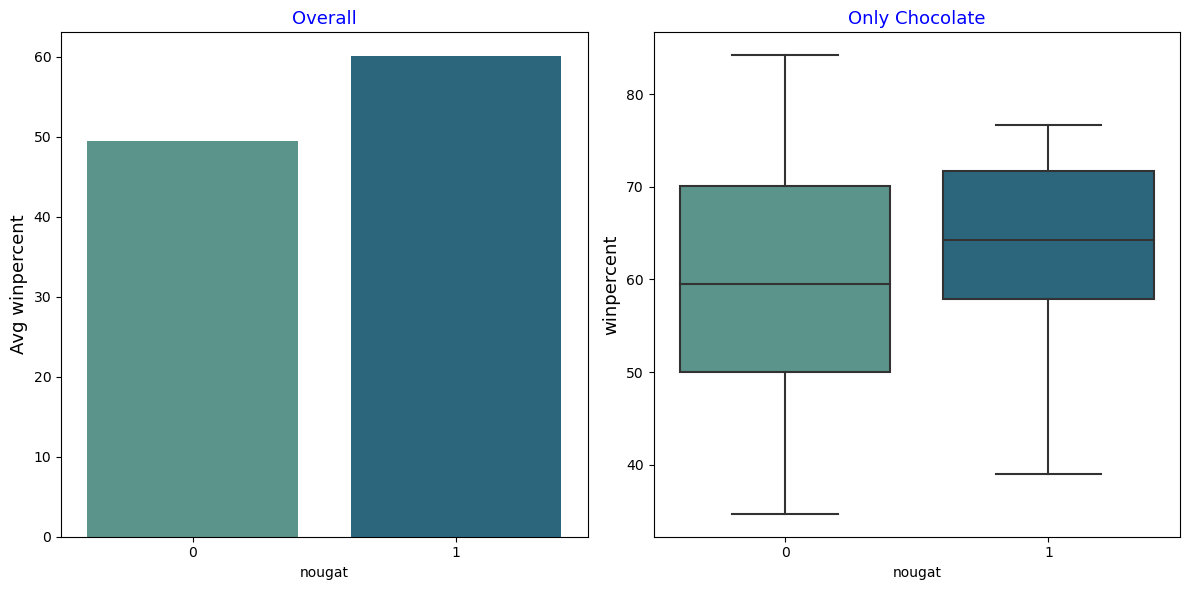

In [47]:
## winpercent of nougat overall and also in combination with chocolate
bar_box_plot_showing_winpercent('nougat')

we can notice that candies containing **nougat**, on average and also with **chocolate** have higher winpercent.

### caramel

In [48]:
## combination of chocolate with nougat
chocolate_with_x('caramel')

,chocolate,caramel,competitorname
0,0,0,44
1,0,1,4
2,1,0,27
3,1,1,10


In [49]:
get_mean_winpercent_chocolate_with_x('caramel')

66.0766174

In [50]:
get_mean_winpercent_chocolate_without_x('caramel')

59.01223755555556

The majority of **chocolate** candies do not contain **caramel**. However, there are still some chocolate candies that include **caramel** as an ingredient. Additionally, inclusion of **caramel** with **chocolate** increases the avg **winpercent**

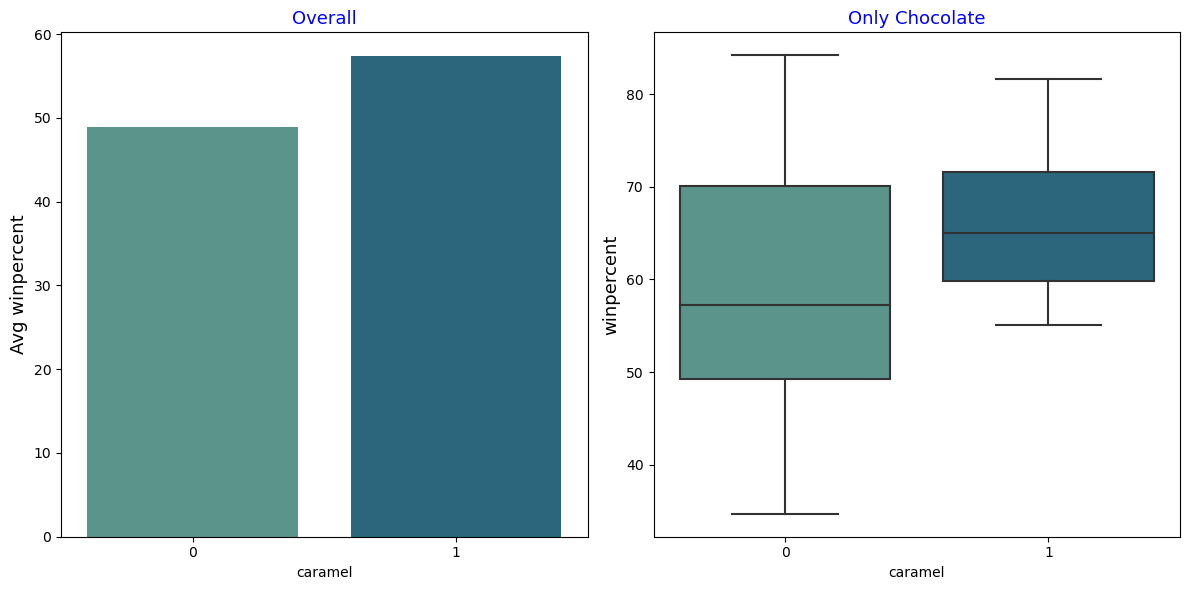

In [51]:
## winpercent of caramel overall and also in combination with chocolate
bar_box_plot_showing_winpercent('caramel')

It's evident that candies containing **caramel**, on average, tend to exhibit slightly higher winpercent values.

### Fruity

In [52]:
## combination of chocolate with fruity
chocolate_with_x('fruity')

,chocolate,fruity,competitorname
0,0,0,11
1,0,1,37
2,1,0,36
3,1,1,1


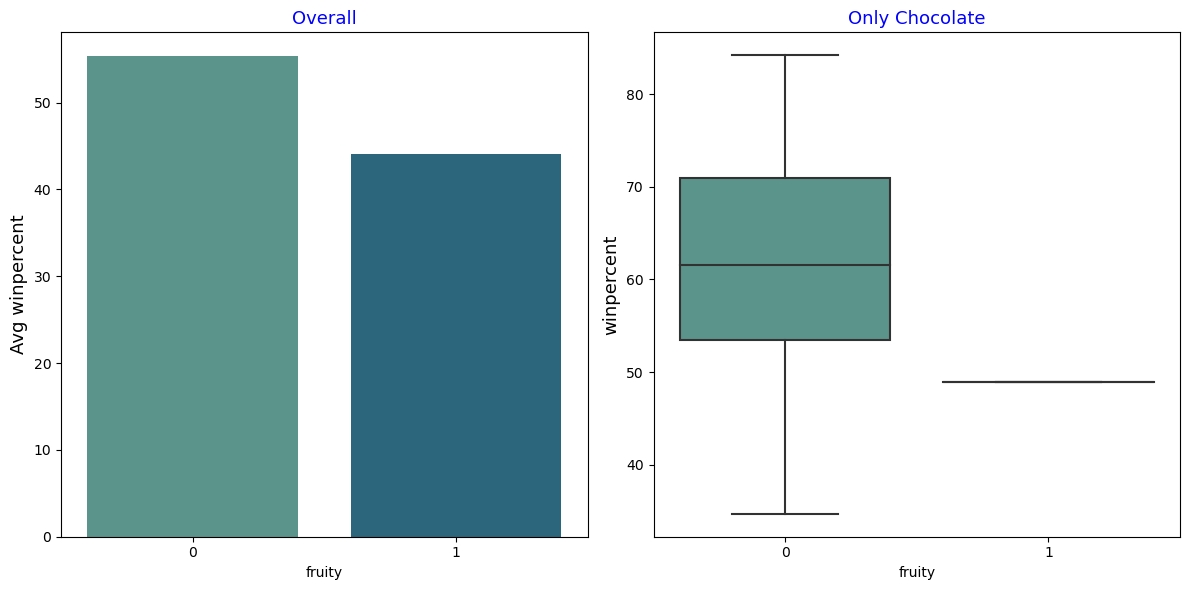

In [53]:
## winpercent of fruity overall and also in combination with chocolate
bar_box_plot_showing_winpercent('fruity')

Like we already saw there is a negative correlation between **chocolate** and **fruity**. There is only one candy which has bothe **chocolate** and **fruity**.Most candies hava eithere **chocolate** or **fruity**. We also see the **winpercent** of Candies with **fruity** is lower than with **fruity**.

### Hard

In [54]:
## combination of chocolate with hard
chocolate_with_x('hard')

,chocolate,hard,competitorname
0,0,0,34
1,0,1,14
2,1,0,36
3,1,1,1


Almost every **hard** cookie does not have **chocolate**

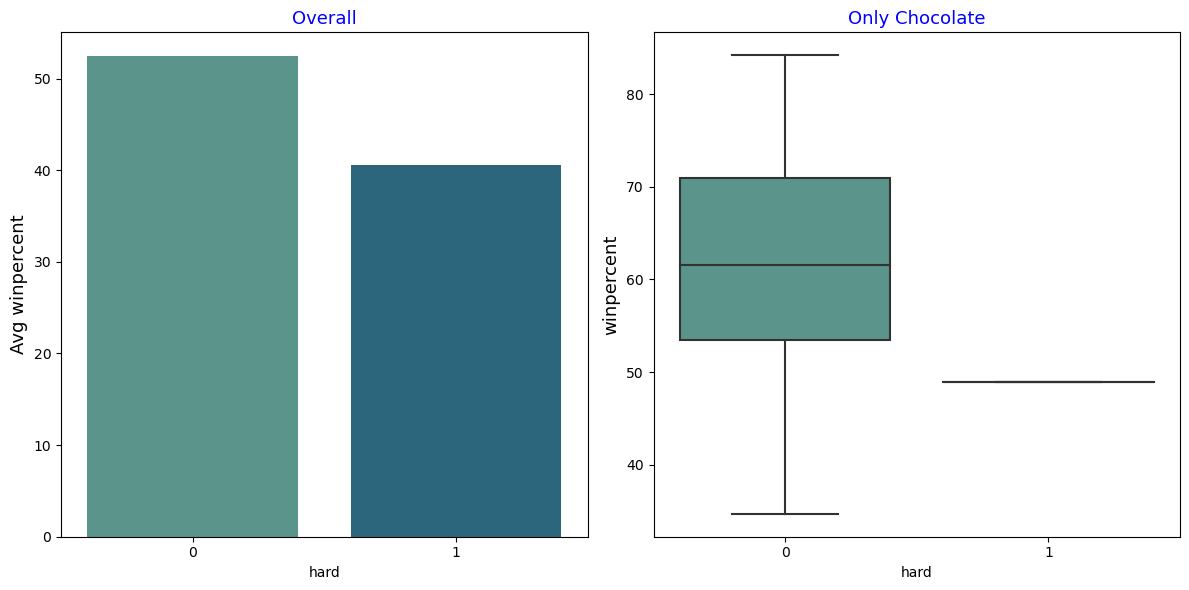

In [55]:
## winpercent of hard overall and also in combination with chocolate
bar_box_plot_showing_winpercent('hard')

**Soft** candies generally exhibit higher winpercent values compared to **hard** candies.

### crispedricewafer

In [56]:
## combination of chocolate with crispedricewafer
chocolate_with_x('crispedricewafer')

,chocolate,crispedricewafer,competitorname
0,0,0,48
1,1,0,30
2,1,1,7


In [57]:
get_mean_winpercent_chocolate_with_x('crispedricewafer')

66.170252

In [58]:
get_mean_winpercent_chocolate_without_x('crispedricewafer')

59.69682746666667

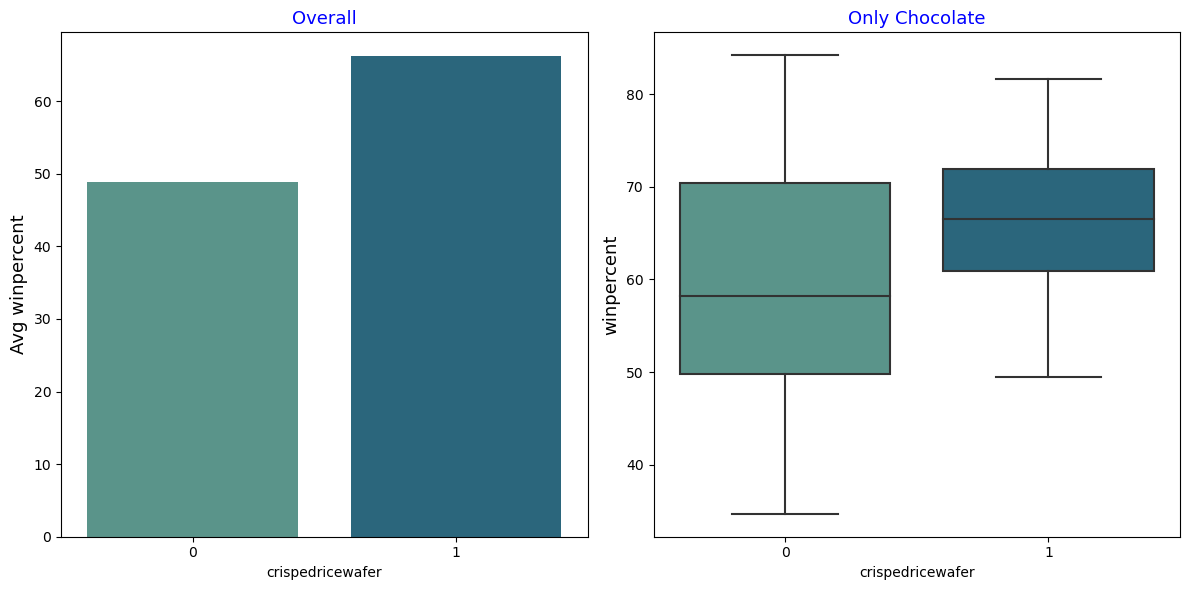

In [59]:
## winpercent of crispedricewafer overall and also in combination with chocolate
bar_box_plot_showing_winpercent('crispedricewafer')

candies with **crispedricewafer** get high winpercent overall as well as with **chocolate**

### pluribus

In [60]:
## combination of chocolate with pluribus
chocolate_with_x('pluribus')

,chocolate,pluribus,competitorname
0,0,0,16
1,0,1,32
2,1,0,25
3,1,1,12


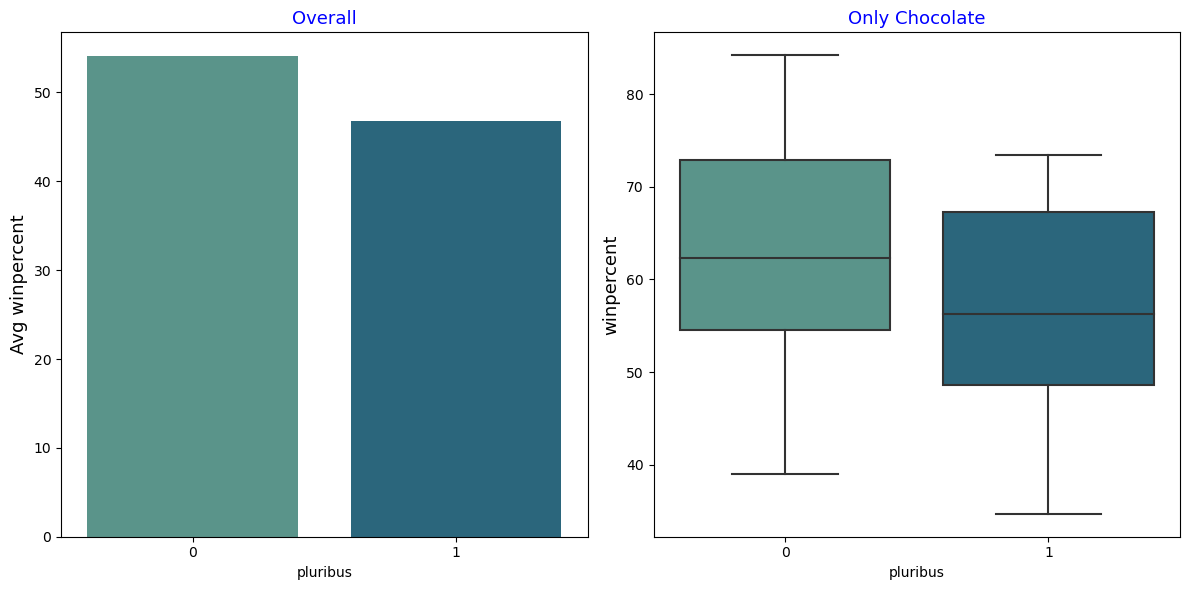

In [61]:
## winpercent of pluribus overall and also in combination with chocolate
bar_box_plot_showing_winpercent('pluribus')

Overall and also candies with **Chocolate** have low winpercent if the Candies from a bag or box. Although there are 12 candies in combination with **chocolate** and **pluribus**. we can say that the inclusion of **pluribus** with **chocolate** may decrease the win percent.

### pricepercent
Since pricepercent differs for fruity and for chocolate, we separate the candies for the analysis.

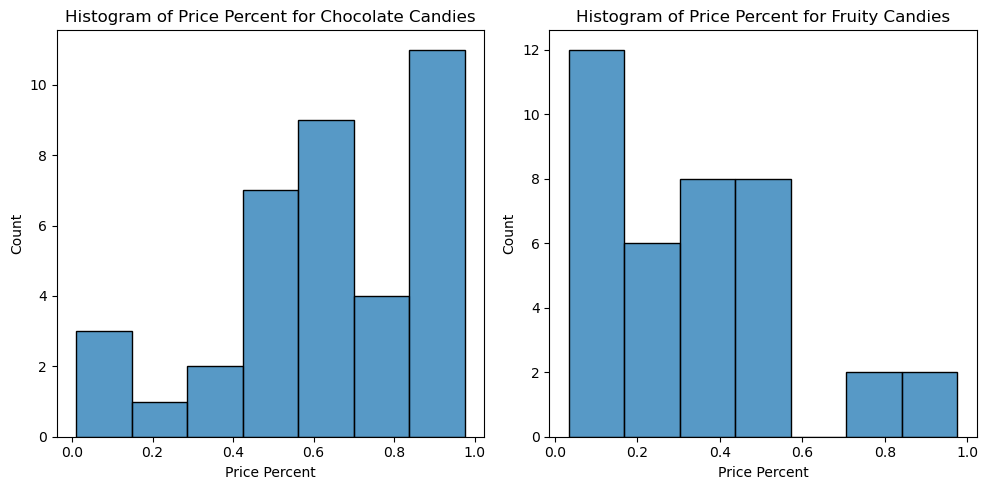

In [62]:
chocolate_df = df[df['chocolate'] == 1]
fruity_df = df[df['fruity'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram (histplot) for pricepercent when chocolate
sns.histplot(data=chocolate_df, x='pricepercent',ax=axes[0])
axes[0].set_title('Histogram of Price Percent for Chocolate Candies')
axes[0].set_xlabel('Price Percent')
# Histogram (histplot) for pricepercent when fruity
sns.histplot(data=fruity_df, x='pricepercent',palette='crest',ax=axes[1])
axes[1].set_title('Histogram of Price Percent for Fruity Candies')
axes[1].set_xlabel('Price Percent')
plt.tight_layout()
plt.show()

Candies containing **chocolate** tend to be slightly pricier compared to **fruity** candies. However, considering that the interviewees didn't have to purchase the candies, it's expected that the impact of price on preferences is minimal.

### sugarpercent
Because of the association between sugar content and both fruity and chocolate candies, we distinguish between these two categories based on their sugar content.

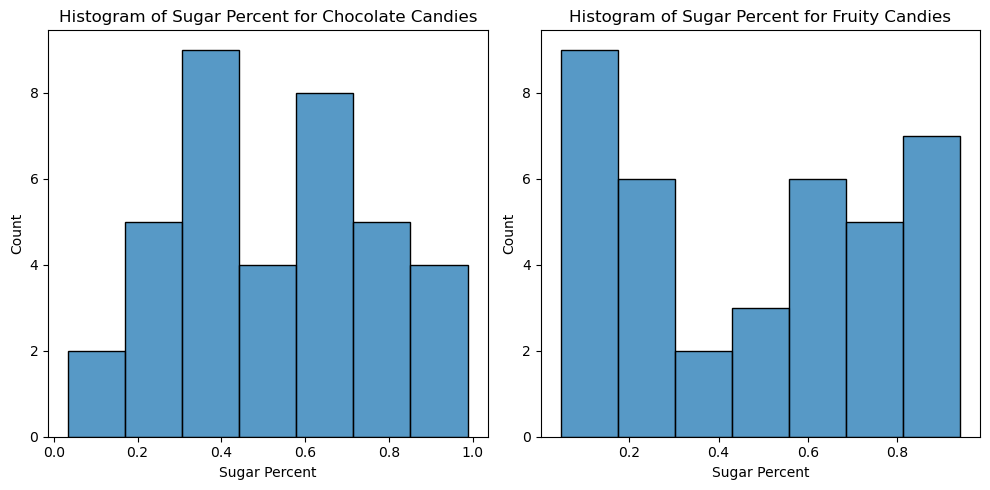

In [63]:
chocolate_df = df[df['chocolate'] == 1]
fruity_df = df[df['fruity'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram (histplot) for pricepercent when chocolate
sns.histplot(data=chocolate_df, x='sugarpercent',palette='crest',ax=axes[0])
axes[0].set_title('Histogram of Sugar Percent for Chocolate Candies')
axes[0].set_xlabel('Sugar Percent')
# Histogram (histplot) for pricepercent when fruity
sns.histplot(data=fruity_df, x='sugarpercent',palette='crest',ax=axes[1])
axes[1].set_title('Histogram of Sugar Percent for Fruity Candies')
axes[1].set_xlabel('Sugar Percent')
plt.tight_layout()
plt.show()

Candies containing **chocolate** generally exhibit a slight trend of having more sugar compared to **fruity** candies. However, this difference in sugar content appears to have a minimal impact or influence.

## Findings:
 + **Chocolate's the Favorite:**

   + People love candies with chocolate the most.
 + **Other Yummy Stuff Matters Too:**

    + Ingredients like peanuts, nougat, crispy wafer, and caramel also make candies more likable.
 + Sweet Candies are a Hit:

   + People really enjoy candies with lots of sugar in them.
 + **Price Doesn't Change Much:**

    + How much candies cost didn't affect how much people liked them in the survey.Hence, my assumption is that the price doesn't impact the winpercent
 + **Best Mix: Chocolate and Peanuts Rock:**

   + Candies with chocolate and peanuts were liked more than candies with chocolate, nougat, crispy wafer, and    caramel.
 + **Making Chocolate and Peanut Mix Even Better:**

    +  Now, let's try adding nougat, crispy wafer, and caramel to chocolate and peanuts to make candies even  tastier!







### chocolate, peanutyalmondy and crispedricewafer

In [64]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==1) &  
   (df['crispedricewafer']==1)].shape

(1, 14)

In [65]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==1) &  
   (df['crispedricewafer']==1)]['winpercent'].mean()

59.529251

### chocolate, peanutyalmondy and not crispedricewafer

In [66]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==1) &  
   (df['crispedricewafer']==0)].shape

(11, 14)

In [67]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==1) & 
   (df['crispedricewafer']==0)]['winpercent'].mean()

69.31965845454545

Among candies featuring chocolate, peanutyalmondy, and crispedricewafer, there's only one. Interestingly, by removing crispedricewafer from this combination of chocolate and peanutyalmondy, we notice an increase in the winpercent.

### chocolate, peanutyalmondy and not nougat

In [68]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==1) &  
   (df['nougat']==0)].shape

(10, 14)

In [69]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==1) & 
   (df['nougat']==0)]['winpercent'].mean()

68.84571650000001

### chocolate, peanutyalmondy and nougat¶

In [70]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==1) &  
   (df['nougat']==1)].shape

(2, 14)

In [71]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==1) & 
   (df['nougat']==1)]['winpercent'].mean()

66.7941645

### chocolate, peanutyalmondy, and caramel 

In [72]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==1) & 
   (df['caramel']==1)].shape

(3, 14)

In [73]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==1) & 
   (df['caramel']==1)]['winpercent'].mean()

64.37252666666666

there are only 3 Candies with **chocolate**, **peanutyalmondy**, and **caramel** and the winpercent is $64.37\%$.

## chocolate, peanutyalmondy, but not caramel 

In [74]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==1) & 
   (df['caramel']==0)].shape

(9, 14)

In [75]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==1) & 
   (df['caramel']==0)]['winpercent'].mean()

69.88087933333334

there are 9 Candies with chocolate, peanutyalmondy, and caramel and the winpercent is almost $70\%$.

### chocolate, not peanutyalmondy, and caramel

In [76]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==0) & 
   (df['caramel']==1)].shape

(7, 14)

In [77]:
df[(df['chocolate']==1) & (df['peanutyalmondy']==0) & 
   (df['caramel']==1)]['winpercent'].mean()

66.806942

there are 7 Candies with chocolate, peanutyalmondy, and caramel and the winpercent is almost  $67\%$.

**In short**, candies with chocolate and peanutyalmondy (without caramel) achieve the highest winpercent. We'll examine if these candies significantly outperform others. Additionally, candies with chocolate and caramel (without peanut/almond) also perform remarkably well, significantly better than others. However, since there are only three candies with all three features, reaching statistical significance is not feasible, despite these being the most important features identified earlier.

## Utilize a machine learning model to gain deeper insights or a more comprehensive understanding.

### Data Preprocessing:

Splitting into features and target variable

In [78]:
X = df[['chocolate', 'peanutyalmondy', 'crispedricewafer', 'nougat', 'caramel']] ## features
Y = df['winpercent'] # target variable


Given the absence of missing or duplicate values in our dataset, there's no immediate need for data cleaning procedures. Moreover, our categorical variables are already in a normalized form, which is advantageous. To enhance the accuracy of our model, we can apply the <code>StandardScaler</code> method specifically to the 'pricepercent' and 'sugarpercent' variables for scaling purposes.

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['sugarpercent', 'pricepercent']] = scaler.fit_transform(X[['sugarpercent', 'pricepercent']])

KeyError: "None of [Index(['sugarpercent', 'pricepercent'], dtype='object')] are in the [columns]"

### Split data into training and testing sets
  I want to use $75\%$ data for training purpose and rest for the testing purpose.

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.25, random_state=42)

In [81]:
X_train.shape, X_test.shape

((63, 5), (22, 5))

### Model Selection

Our objective is not centered around predicting **winpercent**; instead, we aim to ascertain the significance of each variable in relation to **winpercent**. Given the presence of numerous categorical variables in our dataset, I intend to utilize the <code>LinearRegression</code> model as a starting point.

### fit the model

In [82]:
from sklearn.linear_model import LinearRegression
# Initializing and fitting Logistic Regression model
logreg = LinearRegression()
logreg.fit(X_train, Y_train)

LinearRegression()

### model evaluation

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicting on the test set
y_pred = logreg.predict(X_test)

# Calculating R-squared
r_squared = r2_score(Y_test, y_pred)

# Calculating MSE and RMSE
mse = mean_squared_error(Y_test, y_pred)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")

R-squared: 0.3009701468356625
Mean Squared Error (MSE): 136.65252625115417


+ R-squared (R² = 0.301):

   + The R-squared value measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). In this case, around 30% of the variance in the target variable can be explained by the linear regression model. Higher values of R-squared closer to 1 indicate a better fit.
+  Mean Squared Error (MSE = 136.65):

   + The MSE represents the average of the squared differences between predicted values and actual values. Here, the average squared difference between the predicted and actual values is approximately 136.65. Lower MSE values indicate a better fit.

### important features

/home/jrana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


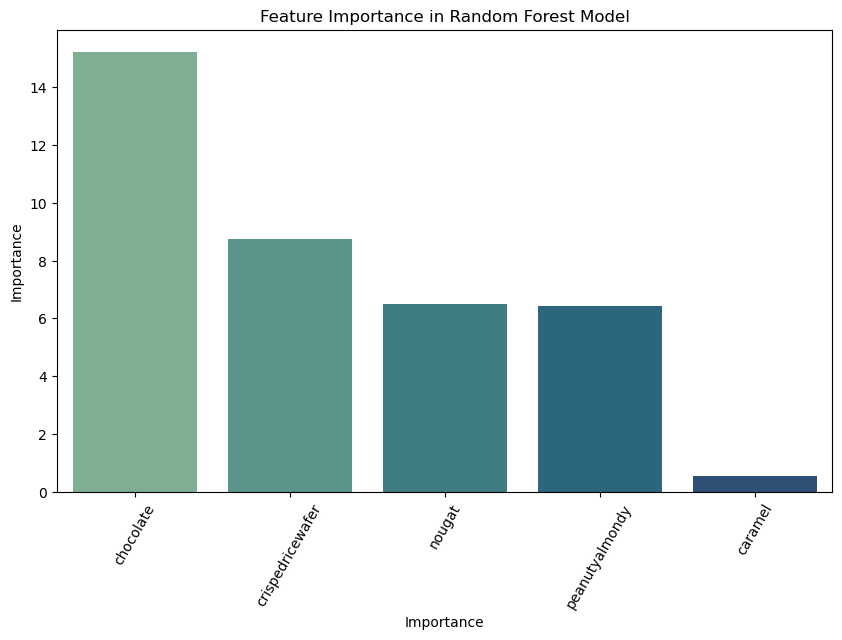

In [84]:
feature_importance_df = pd.DataFrame({'Feature':X.columns
                                      , 'Importance': logreg.coef_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(feature_importance_df['Feature'], feature_importance_df['Importance'],palette='crest')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=60)
plt.show()

Here we can still see that **chocolate** has the most importance following with **sugarpercent**, **pricepercent** and **peanutyalmondy**

The **MSE** and **R-squared** values indicate that our current model performance is suboptimal. One possible reason for this could be the predominant use of categorical independent variables. Due to their categorical nature, determining a linear relationship becomes challenging. To address this limitation, let's explore the efficacy of employing tree-based models.

### convert **winpercent_class** into numberic

In [87]:
df['winpercent_class'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [88]:
df['winpercent_class_numeric']=df['winpercent_class'].map({'low':0,'medium':1,'high':2})

In [91]:
X = df[['chocolate', 'peanutyalmondy', 'crispedricewafer', 'nougat', 'caramel']] ## features
Y = df['winpercent_class_numeric'] # target variable
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.25, random_state=42)

In [92]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, Y_train)
# Get feature importances
#importances = clf.feature_importances_

DecisionTreeClassifier(random_state=42)

## model evaluation

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, predictions)
accuracy*100

59.09090909090909

we can see that our model is performing well this time. it can predict 59% time correctly. 

### heatmap for confusion metrix

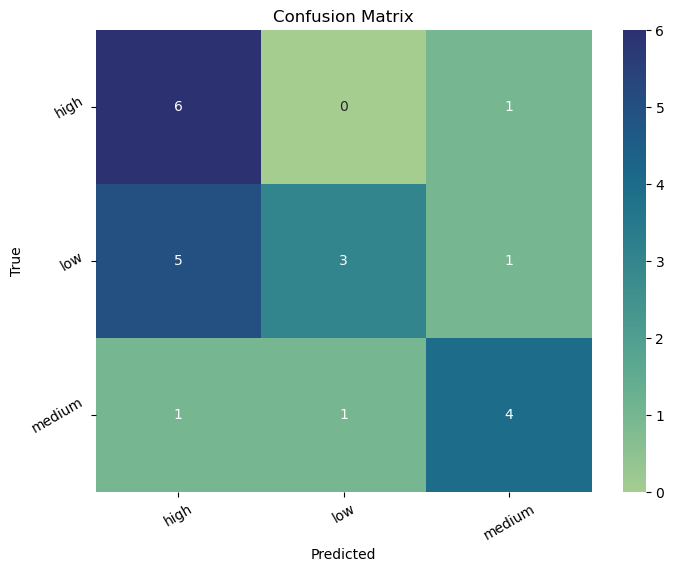

In [102]:
conf_matrix = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='crest', fmt='d', xticklabels=df['winpercent_class'].unique(), 
            yticklabels=df['winpercent_class'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=30)
plt.yticks(rotation=30)

plt.show()


In [105]:
from sklearn.metrics import classification_report

# Assuming predictions and y_test are your predicted labels and true labels respectively
# Replace predictions and y_test with your actual variables
report = classification_report(Y_test, predictions, target_names=df['winpercent_class'].unique())

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        high       0.50      0.86      0.63         7
         low       0.75      0.33      0.46         9
      medium       0.67      0.67      0.67         6

    accuracy                           0.59        22
   macro avg       0.64      0.62      0.59        22
weighted avg       0.65      0.59      0.57        22



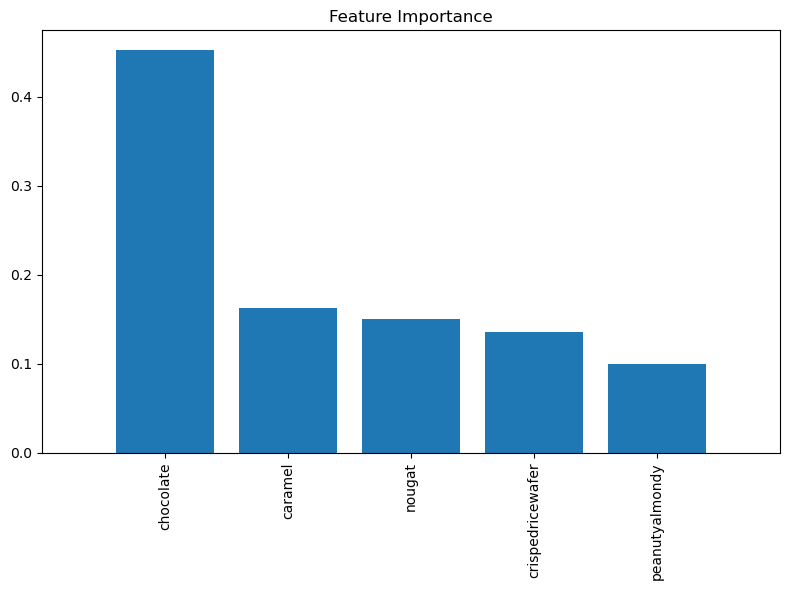

In [106]:
importances = clf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

## Summary

The individual analysis indicates that **chocolate**, **peanutyalmondy**, **nougat**, **crispy wafer**,  and **caramel** emerge as the most influential features. Candies containing **chocolate** alongside either **peanutyalmondy** tend to be the top-performing ones.I haven't identified any additional ingredient that consistently contributes to high winpercent when paired with both **chocolate** and **peanutyalmondy**.

However, exploring these features together in multivariate analysis doesn't provide additional or more meaningful insights beyond what was revealed in the individual (univariate) analysis.

## Recommendation:
Consider producing candies that include **chocolate** and **peanutyalmondy** ingredients, ideally with a moderate sugar content.
